# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Australian EV Sales Dataset 

### Australian EV Annual Sales Dataset (2011 to 2021)

In [ ]:
# Import Australian EV sales dataset (2011 to 2021)
df_ev_sales = pd.read_csv('/content/drive/MyDrive/SIT764/Australian electric vehicle sales (2011 to 2021).csv')
df_ev_sales

,Year,Sales
0,2011,49
1,2012,253
2,2013,293
3,2014,1322
4,2015,1771
5,2016,1369
6,2017,2284
7,2018,2216
8,2019,6718
9,2020,6900


### Australian EV Monthly Sales Dataset (2022)

In [ ]:
# Import Australian EV sales dataset (Jan to Apr 2022)
df_ev_sales_1to4 = pd.read_excel('/content/drive/MyDrive/SIT764/Australian electric vehicle sales (January to April 2022).xlsx')
df_ev_sales_1to4

,Model,January,February,March,April
0,Tesla Model 3,660,660,3097,52
1,Hyundai Kona Electric,90,81,133,90
2,Mercedes-Benz EQA,97,78,143,65
3,Hyundai Ioniq Electric,68,63,75,76
4,Volvo XC40 Recharge Pure Electric,0,46,85,122
5,Porsche Taycan,37,48,75,58
6,Mercedes-Benz EQC,76,39,57,38
7,Polestar 2,0,0,115,93
8,Kia EV6,15,34,92,52
9,Hyundai Ioniq 5,38,38,57,30


In [ ]:
# Calculate the total ev sales in Jan/Feb/Mar/Apr
Jan = df_ev_sales_1to4['January'].sum()
Feb = df_ev_sales_1to4['February'].sum()
Mar = df_ev_sales_1to4['March'].sum()
Apr = df_ev_sales_1to4['April'].sum()

In [ ]:
# Import Australian EV sales dataset (May 2022)
df_ev_sales_5 = pd.read_excel('/content/drive/MyDrive/SIT764/Australian electric vehicle sales (May 2022).xlsx')
df_ev_sales_5

,Model,May sales
0,Volvo XC40 Recharge Pure Electric,174
1,Polestar 2,153
2,Hyundai Kona Electric,78
3,Hyundai Ioniq 5,56
4,Hyundai Ioniq Electric,53
5,Mini Cooper SE,52
6,BMW i4,49
7,Nissan Leaf,46
8,Porsche Taycan,42
9,Kia EV6,40


In [ ]:
# Calculate the total ev sales in May
May = df_ev_sales_5['May sales'].sum()

In [ ]:
# Import Australian EV sales dataset (First half of 2022)
df_ev_sales_6 = pd.read_excel('/content/drive/MyDrive/SIT764/Australian electric vehicle sales (first half of 2022).xlsx')
df_ev_sales_6

,Model,Sales,Percentage of total model sales
0,Tesla Model 3,4653,100.0
1,Hyundai Kona Electric,570,8.6
2,Polestar 2,562,100.0
3,Volvo XC40 Recharge Pure Electric,505,18.3
4,Mercedes-Benz EQA,443,100.0
5,Hyundai Ioniq Electric,385,81.2
6,Hyundai Ioniq 5,321,100.0
7,Porsche Taycan,307,100.0
8,Kia EV6,294,100.0
9,Mercedes-Benz EQC,257,100.0


In [ ]:
# Calculate the total ev sales in Jun
Jun = df_ev_sales_6['Sales'].sum() - Jan - Feb - Mar - Apr - May

In [ ]:
# Import Australian EV sales dataset (Jul 2022)
df_ev_sales_7 = pd.read_excel('/content/drive/MyDrive/SIT764/Australian electric vehicle sales (July 2022).xlsx')
df_ev_sales_7

,Model,July,Year to date
0,Polestar 2,94,656
1,Hyundai Kona Electric,83,653
2,Hyundai Ioniq Electric,69,454
3,Kia EV6,52,346
4,Porsche Taycan,42,349
5,Hyundai Ioniq 5,25,346
6,Mercedes-Benz EQA,22,465
7,Mercedes-Benz EQS,22,30
8,Volvo XC40 Recharge Pure Electric,17,522
9,Audi E-Tron,14,81


In [ ]:
# Calculate the total ev sales in Jul
Jul = df_ev_sales_7['July'].iloc[:23].sum()
Jul

498

In [ ]:
# Import Australian EV sales dataset (Jan to Aug 2022)
df_ev_sales_8 = pd.read_excel('/content/drive/MyDrive/SIT764/Australian electric vehicle sales (Jan to August Total 2022).xlsx')
df_ev_sales_8

,Model,Year-to-date
0,Tesla Model 3,7037.0
1,Tesla Model Y,1017.0
2,Hyundai Kone,777.0
3,Polestar 2,694.0
4,MG ZS EV,673.0
5,Hyundai Ioniq,532.0
6,Volvo XC40 recharge,525.0
7,Mercedes-Benz EQA,489.0
8,Kia EV6,426.0
9,Hyundai Ioniq 5,418.0


In [ ]:
# Calculate the total ev sales in Aug
Aug = df_ev_sales_8['Year-to-date'].sum() - Jan - Feb - Mar - Apr - May - Jun - Jul
Aug

4429.0

Up to September 2022, 26,356 EVs were sold in Australia. (Source link: https://www.pv-magazine-australia.com/2022/10/18/australian-ev-market-share-grows-65-in-2022/#:~:text=Up%20to%20September%202022%2C%2026%2C356,of%20EVs%20report%20published%20Friday.)

In [ ]:
# Calculate the total ev sales in Sep
Sep = 26356 - Jan - Feb - Mar - Apr - May - Jun - Jul - Aug
Sep

11749.0

In [ ]:
# Creat Australian EV mothly sales dataset (Jan to Sep 2022)
df_ev_sales_2022 = pd.DataFrame()
 
df_ev_sales_2022['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep']
df_ev_sales_2022['Sales'] = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep]

df_ev_sales_2022

,Month,Sales
0,Jan,1314.0
1,Feb,1254.0
2,Mar,4193.0
3,Apr,848.0
4,May,920.0
5,Jun,1151.0
6,Jul,498.0
7,Aug,4429.0
8,Sep,11749.0


## Australia EV charging station dataset

In [ ]:
df_Station_Number = pd.read_excel('/content/drive/MyDrive/SIT764/statistic_id1181667_electric-vehicle-charging-stations-in-australia-2018-2021-by-type.xlsx', sheet_name='Data')

In [ ]:
df_Station_Number

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,Electric vehicle charging stations in Australi...,NaN,NaN
2,NaN,Number of public charging stations for electri...,NaN,NaN
3,NaN,NaN,DC,AC
4,NaN,2018,69,714
5,NaN,2019,251,1679
6,NaN,2020,357,1950
7,NaN,2021,470,2531


In [ ]:
df_Station_Number = df_Station_Number.drop(index=[0,1,2,3],columns=['Unnamed: 0'])

In [ ]:
names = ['Year','DC','AC']
df_Station_Number.columns = names

In [ ]:
df_Station_Number

,Year,DC,AC
4,2018,69,714
5,2019,251,1679
6,2020,357,1950
7,2021,470,2531


In [ ]:
df_Station_Number['Total'] = df_Station_Number['DC'] + df_Station_Number['AC']

In [ ]:
df_Station_Number

,Year,DC,AC,Total
4,2018,69,714,783
5,2019,251,1679,1930
6,2020,357,1950,2307
7,2021,470,2531,3001


## Australia polulation dataset(2011 to 2021)

In [ ]:
df_population = pd.read_excel('/content/drive/MyDrive/SIT764/statistic_id608530_population-breakdown-australia-2011-2021-by-gender.xlsx',sheet_name='Data')

In [ ]:
df_population

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,Population breakdown Australia 2011-2021 by ge...,NaN,NaN
2,NaN,Population breakdown in Australia from 2011 to...,NaN,NaN
3,NaN,NaN,Females,Males
4,NaN,2011,11.32,11.21
5,NaN,2012,11.53,11.41
6,NaN,2013,11.62,11.51
7,NaN,2014,11.81,11.67
8,NaN,2015,11.99,11.83
9,NaN,2016,12.19,12


In [ ]:
df_population = df_population.drop(index=[0,1,2,3],columns=['Unnamed: 0'])
df_population['Total'] = df_population['Unnamed: 2'] + df_population['Unnamed: 3']
df_population['Total']

4     22.53
5     22.94
6     23.13
7     23.48
8     23.82
9     24.19
10     24.6
11     25.0
12    25.37
13    25.69
14    25.73
Name: Total, dtype: object

In [ ]:
popu = pd.Series(df_population['Total'].values)
popu

0     22.53
1     22.94
2     23.13
3     23.48
4     23.82
5     24.19
6      24.6
7      25.0
8     25.37
9     25.69
10    25.73
dtype: object

In [ ]:
# Creat Australian population (2011-2021)
df_popu = pd.DataFrame(columns = ['Year','Population'])
df_popu['Year'] = np.arange(2011, 2022, 1)
df_popu['Population'] = popu

df_popu

,Year,Population
0,2011,22.53
1,2012,22.94
2,2013,23.13
3,2014,23.48
4,2015,23.82
5,2016,24.19
6,2017,24.6
7,2018,25.0
8,2019,25.37
9,2020,25.69


# Visualize Data

## Australia EV Sales

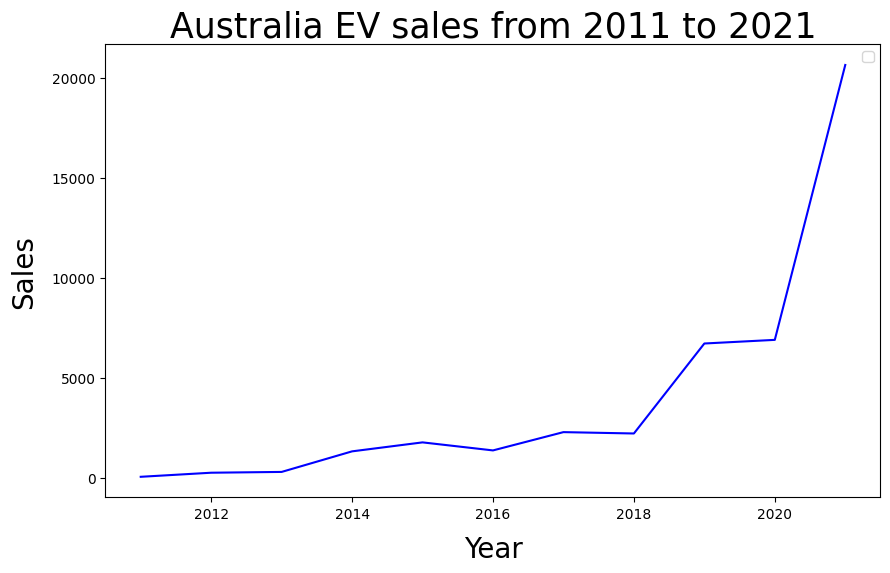

In [ ]:
y = df_ev_sales['Sales']
x = df_ev_sales['Year']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y, color='blue')
plt.title('Australia EV sales from 2011 to 2021',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Sales', fontsize=20, labelpad=10)
plt.legend()
plt.show()

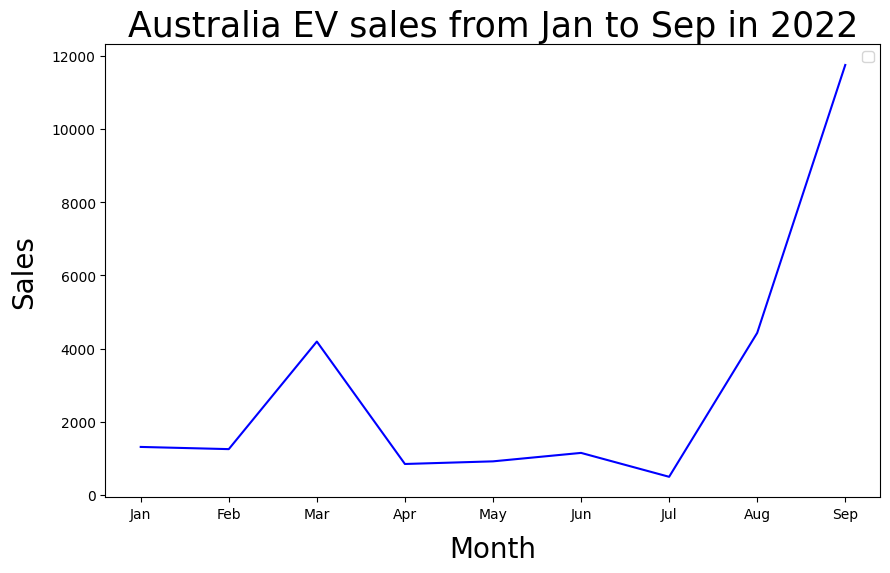

In [ ]:
y = df_ev_sales_2022['Sales']
x = df_ev_sales_2022['Month']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y, color='blue')
plt.title('Australia EV sales from Jan to Sep in 2022',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Month', fontsize=20, labelpad=10)
plt.ylabel('Sales', fontsize=20, labelpad=10)
plt.legend()
plt.show()

## Australia EV Charging Station

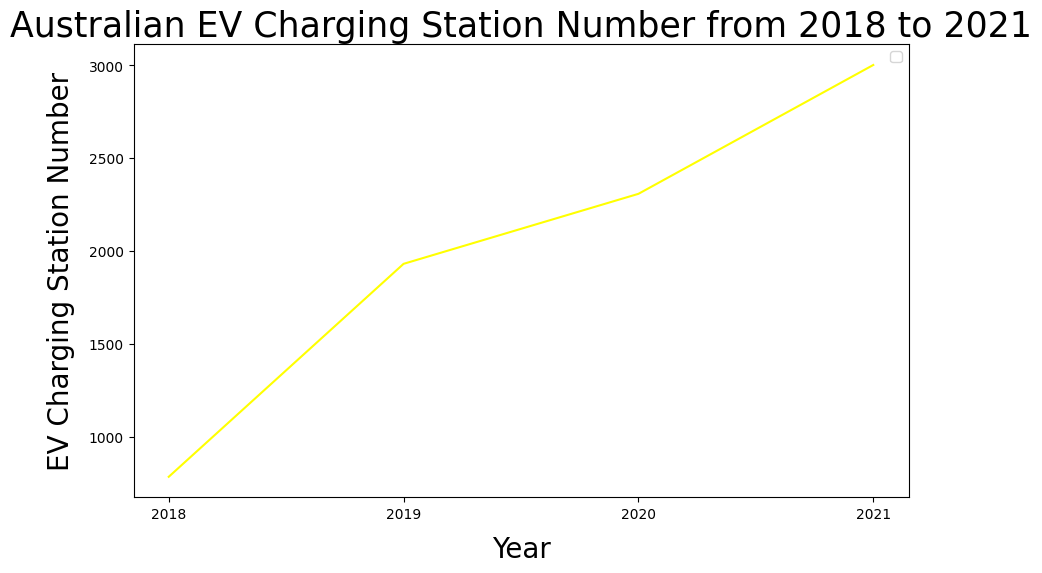

In [ ]:
y = df_Station_Number['Total']
x = df_Station_Number['Year']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y, color='yellow')
plt.title('Australian EV Charging Station Number from 2018 to 2021',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('EV Charging Station Number', fontsize=20, labelpad=10)
plt.legend()
plt.show()

## Australia Population

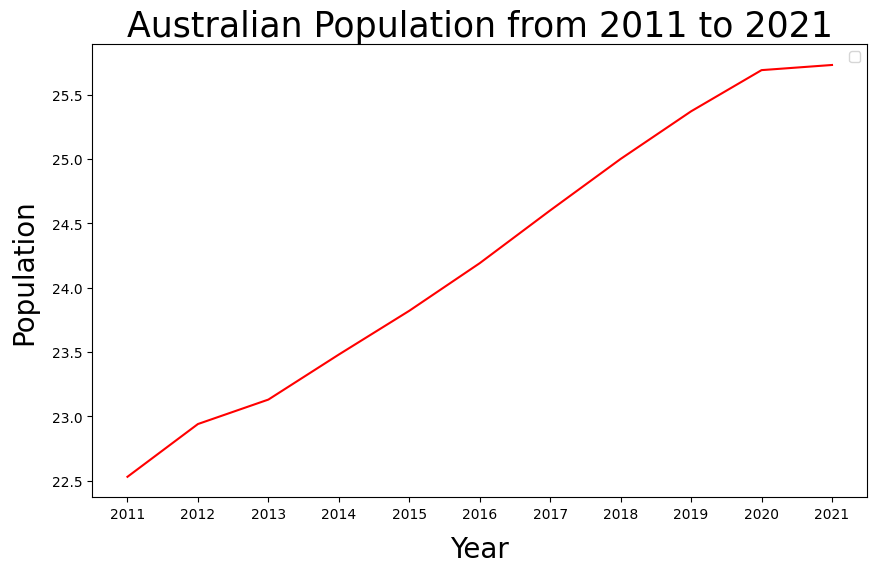

In [ ]:
y = df_population['Total']
x = df_population['Year']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y, color='red')
plt.title('Australian Population from 2011 to 2021',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Population', fontsize=20, labelpad=10)
plt.legend()
plt.show()

## Australian EV sales vs population

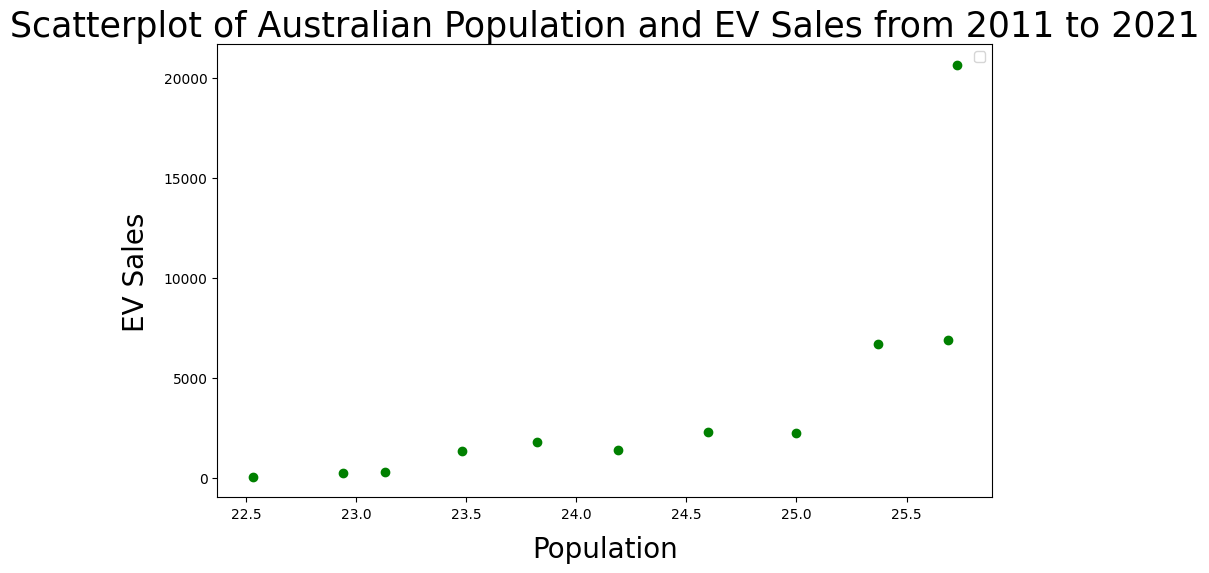

In [ ]:
x = df_popu['Population']
y = df_ev_sales['Sales']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(x, y, color='green')
plt.title('Scatterplot of Australian Population and EV Sales from 2011 to 2021',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Population', fontsize=20, labelpad=10)
plt.ylabel('EV Sales', fontsize=20, labelpad=10)
plt.legend()
plt.show()

#Build Model to Predict Australian EV Sales in Next Decade

## Linear Regression Model

In [ ]:
# Reshape the sales data to np.array
train_sales_x = df_ev_sales['Year']
train_sales_y = df_ev_sales['Sales']
pred_sales_x = np.arange(2022,2033,1)

train_sales_length = len(train_sales_x)
pred_sales_length = len(pred_sales_x)

train_sales_x = np.array(train_sales_x).reshape([train_sales_length,1])
train_sales_y = np.array(train_sales_y)

pred_sales_x = np.array(pred_sales_x).reshape([pred_sales_length,1])

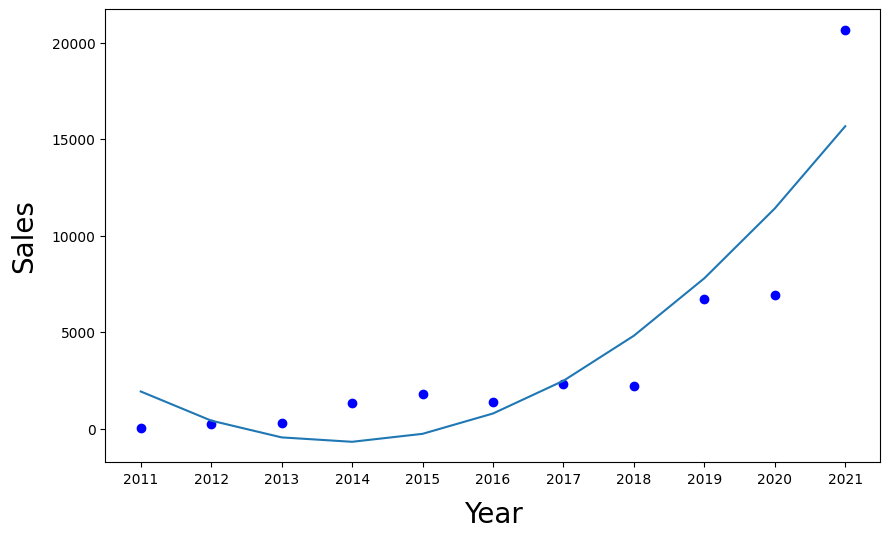

In [ ]:
# Build linear regression model (polynomial regression, degree=2) to learn the relationship between X_poly and train_sales_y
from numpy.polynomial import Polynomial
poly_reg = PolynomialFeatures(degree=2)
x_poly_2 = poly_reg.fit_transform(train_sales_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_2,train_sales_y)

#draw scatter
plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(train_sales_x,train_sales_y,color='blue')

x_ticks = np.arange(2011,2022,1)
plt.xticks(x_ticks)

x = np.arange(2011,2022).reshape([-1,1])
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Sales', fontsize=20, labelpad=10)
plt.show()

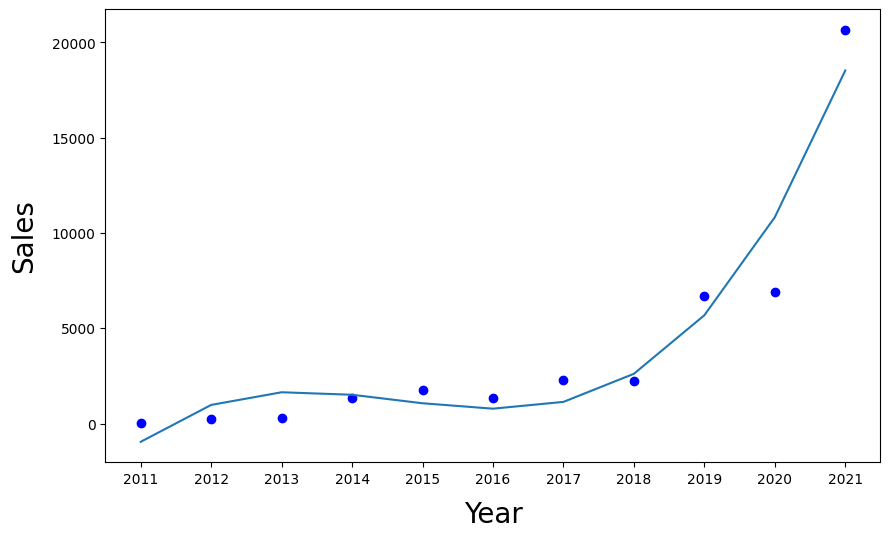

In [ ]:
#build linear regression model (polynomial regression, degree=3) to learn the relationship between X_poly and ev_sales_y
from numpy.polynomial import Polynomial
poly_reg = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg.fit_transform(train_sales_x)


lin_reg = LinearRegression()
lin_reg.fit(x_poly_3,train_sales_y)

#draw scatter
plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(train_sales_x,train_sales_y,color='blue')

x_ticks = np.arange(2011,2022,1)
plt.xticks(x_ticks)

x = np.arange(2011,2022).reshape([-1,1])
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Sales', fontsize=20, labelpad=10)
plt.show()

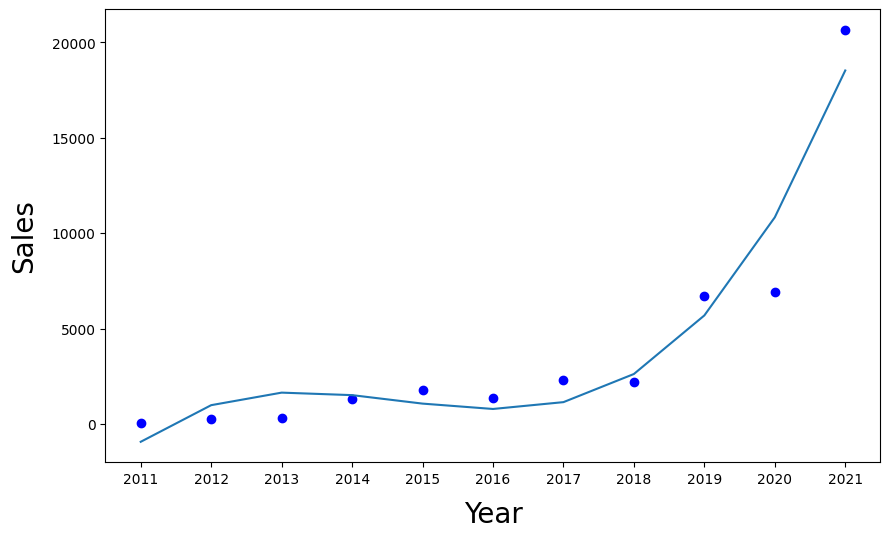

In [ ]:
#build linear regression model (polynomial regression, degree=4) to learn the relationship between X_poly and train_sales_y
from numpy.polynomial import Polynomial
poly_reg = PolynomialFeatures(degree=4)
x_poly_2 = poly_reg.fit_transform(train_sales_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_2,train_sales_y)

#draw scatter
plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(train_sales_x,train_sales_y,color='blue')

x_ticks = np.arange(2011,2022,1)
plt.xticks(x_ticks)

x = np.arange(2011,2022).reshape([-1,1])
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Sales', fontsize=20, labelpad=10)
plt.show()

As there is alomost no difference between the results by adjusting 'degree=3' and 'degree=4', keep 'degree=3'.

In [ ]:
#Using polynomial regression model (degree=3) to predict the future EV sales
poly_reg = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg.fit_transform(train_sales_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_3,train_sales_y)

pred_x = poly_reg.fit_transform(pred_sales_x)
pred_sales = lin_reg.predict(pred_x).astype(int)
print(pred_sales)

[ 29253  43489  61712  84399 112029 145079 184028 229353 281534 341047
 408371]


In [ ]:
#Create a dataframe containing the predicted information from 2022 to 2032
df_pred_sales = pd.DataFrame(columns=['Year','Predicted Sales by LR'])
df_pred_sales['Year'] = pd.DataFrame(pred_sales_x)
df_pred_sales['Predicted Sales by LR'] = pd.DataFrame(pred_sales)
df_pred_sales

,Year,Predicted Sales by LR
0,2022,29253
1,2023,43489
2,2024,61712
3,2025,84399
4,2026,112029
5,2027,145079
6,2028,184028
7,2029,229353
8,2030,281534
9,2031,341047


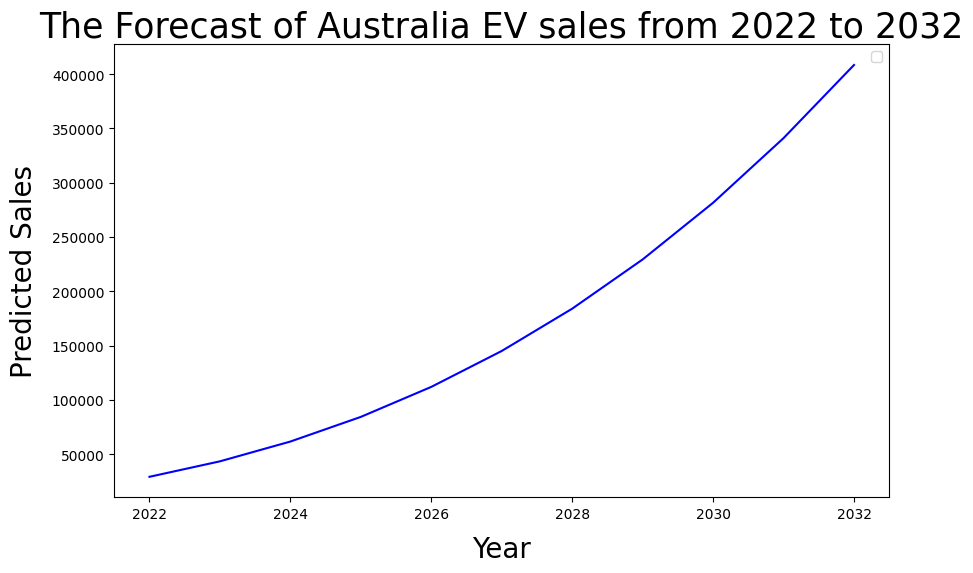

In [ ]:
#draw figure
x = df_pred_sales['Year']
y = df_pred_sales['Predicted Sales by LR']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y, color='blue')
plt.title('The Forecast of Australia EV sales from 2022 to 2032',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Predicted Sales', fontsize=20, labelpad=10)
plt.legend()
plt.show()

## Autoregressive Integrated Moving Average Model

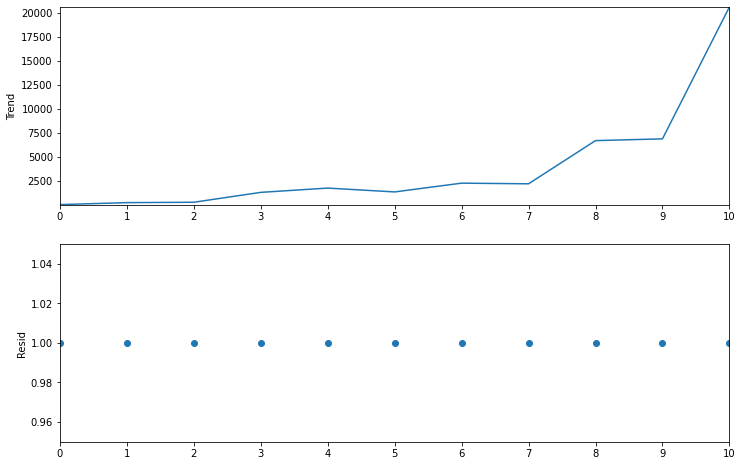

In [ ]:
# ETS Decomposition Models(trend, residual)
arima_data = df_ev_sales['Sales']
result = seasonal_decompose(arima_data, model='multiplicative', freq=1)
plt.figure(figsize=(12,8))
plt.xticks(df_ev_sales.index[::1], rotation=0) 
plt.margins(0)
plt.subplot(2,1,1)
plt.plot(result.trend)
plt.ylabel('Trend')
plt.xticks(df_ev_sales.index[::1], rotation=0)
plt.margins(0)
plt.subplot(2,1,2)
plt.scatter(df_ev_sales.index,result.resid);
plt.ylabel('Resid')
plt.xticks(df_ev_sales.index[::1], rotation=0)
plt.margins(0) 

In [ ]:
# Dickey-Fuller test
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test\n-----------------------------------------------------")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index = [
        "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    print("-----------------------------------------------------")  
   
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing.")
adf_test(arima_data)

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                 7.130939
p-value                        1.000000
#Lags Used                     1.000000
Number of Observations Used    9.000000
Criterical Value (1%)         -4.473135
Criterical Value (5%)         -3.289881
Criterical Value (10%)        -2.772382
dtype: float64
-----------------------------------------------------
The data is non-stationary, so do differencing.


Test Statistic > Criterical Value (10%) The data is non-stationary, so do differencing.

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                 2.605139
p-value                        0.999076
#Lags Used                     1.000000
Number of Observations Used    8.000000
Criterical Value (1%)         -4.665186
Criterical Value (5%)         -3.367187
Criterical Value (10%)        -2.802961
dtype: float64
-----------------------------------------------------
The data is non-stationary, so do differencing.


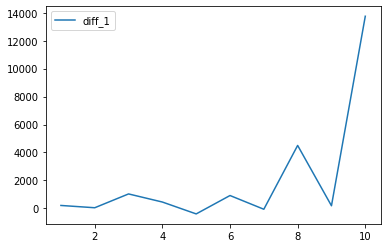

In [ ]:
# First order difference 
diff_1 = arima_data - arima_data.shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()
diff_1.plot(figsize=(6,4), label='diff_1')
plt.legend()

adf_test(diff_1)

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                -0.061678
p-value                        0.953124
#Lags Used                     1.000000
Number of Observations Used    7.000000
Criterical Value (1%)         -4.938690
Criterical Value (5%)         -3.477583
Criterical Value (10%)        -2.843868
dtype: float64
-----------------------------------------------------
The data is non-stationary, so do differencing.


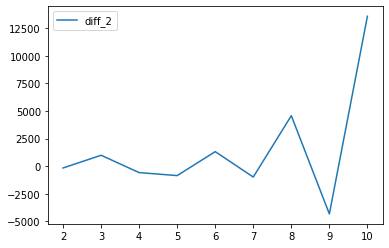

In [ ]:
# Second oreder difference 
diff_2 = diff_1 - diff_1.shift(1) 
diff_2 = diff_2.dropna()
diff_2.head()
diff_2.plot(figsize=(6,4), label='diff_2')
plt.legend()

adf_test(diff_2)

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                -42.321906
p-value                         0.000000
#Lags Used                      2.000000
Number of Observations Used     5.000000
Criterical Value (1%)          -6.045114
Criterical Value (5%)          -3.929280
Criterical Value (10%)         -2.986810
dtype: float64
-----------------------------------------------------
The data is stationary. (Criterical Value 1%)


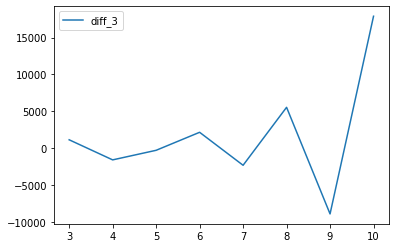

In [ ]:
# Third oreder difference 
diff_3 = diff_2 - diff_2.shift(1) 
diff_3 = diff_3.dropna()
diff_3.head()
diff_3.plot(figsize=(6,4), label='diff_3')
plt.legend()

adf_test(diff_3)

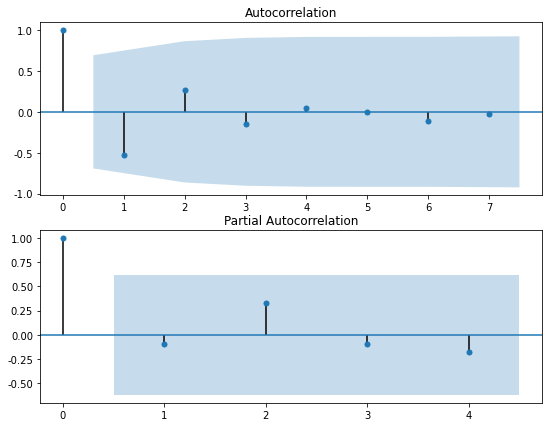

In [ ]:
# Draw ACF(Autocorrelation Function)、PACF(Partial Autocorrelation Function)
# Find best p/q
f = plt.figure(facecolor='white', figsize=(9,7))
ax1 = f.add_subplot(211)
plot_acf(diff_3, lags=7, ax=ax1);
ax2 = f.add_subplot(212);
plot_pacf(diff_1, lags=4, ax=ax2);
plt.rcParams['axes.unicode_minus'] = False 
plt.show()

According to the figures above, p=0,q=0

In [ ]:
# Build the ARIMA Model
arima_data = arima_data.astype('float64')
model = ARIMA(arima_data, order=(0,2,0))
model_fit = model.fit(disp=-1)

#Showing summary of model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Sales   No. Observations:                    9
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -89.074
Method:                           css   S.D. of innovations           4808.424
Date:                Wed, 14 Dec 2022   AIC                            182.147
Time:                        03:32:29   BIC                            182.542
Sample:                             2   HQIC                           181.296
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1505.4444   1602.808      0.939      0.348   -1636.001    4646.890


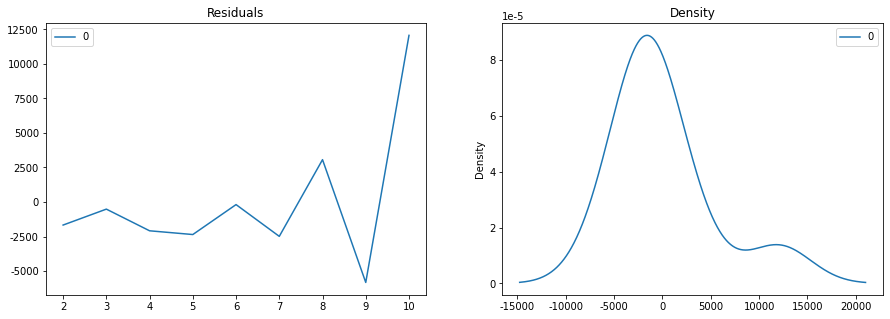

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15, 5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

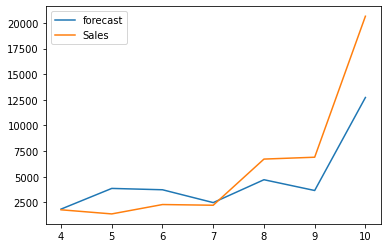

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# one-step out-of sample forecast
forecast = model_fit.forecast(steps=11)[0].astype(int)
forecast

df_pred_sales['Predicted Sales by ARIMA'] = forecast

df_pred_sales

,Year,Predicted Sales by LR,Predicted Sales by ARIMA
0,2022,29253,35911
1,2023,43489,52675
2,2024,61712,70944
3,2025,84399,90719
4,2026,112029,111999
5,2027,145079,134785
6,2028,184028,159076
7,2029,229353,184873
8,2030,281534,212175
9,2031,341047,240982


## Compare Models

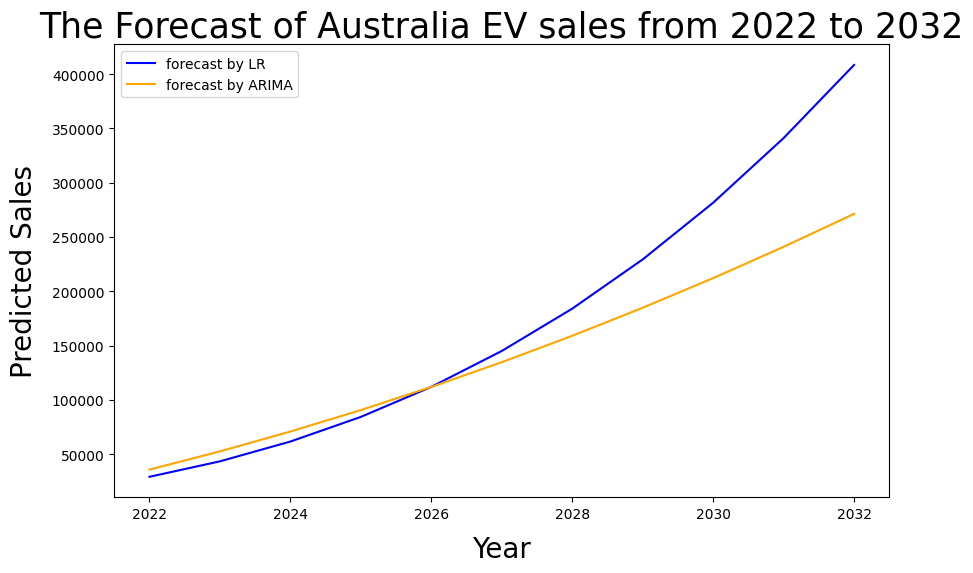

In [ ]:
# Draw figure to the difference between the forecast of 2 models
x = df_pred_sales['Year']
y1 = df_pred_sales['Predicted Sales by LR']
y2 = df_pred_sales['Predicted Sales by ARIMA']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y1, color='blue', label='forecast by LR')
plt.plot(x, y2, color='orange',label='forecast by ARIMA')
plt.title('The Forecast of Australia EV sales from 2022 to 2032',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Predicted Sales', fontsize=20, labelpad=10)
plt.legend()
plt.show()

Up to September 2022, 26,356 EVs were sold in Australia.
Based on LR model, 29,253 EV will be sold in 2022. While according to ARIMA model, 35,911 EV will be sold in 2022.

#Build Model to Predict Australian Population in Next decade

In [ ]:
# Split the dataset
train_popu = df_popu[:8]
test_popu = df_popu[8:12]

## Linear Regression Model

In [ ]:
# Reshape the population data to np.array
train_popu_x = train_popu['Year']
train_popu_y = train_popu['Population']
test_popu_x = test_popu['Year']
test_popu_y = test_popu['Population']
pred_popu_x = np.arange(2022,2033,1)

train_popu_length = len(train_popu_x)
test_popu_length = len(test_popu_x)
pred_popu_length = len(pred_popu_x)

train_popu_x = np.array(train_popu_x).reshape([train_popu_length,1])
train_popu_y = np.array(train_popu_y)
test_popu_x = np.array(test_popu_x).reshape([test_popu_length,1])
test_popu_y = np.array(test_popu_y)

pred_popu_x = np.array(pred_popu_x).reshape([pred_popu_length,1])

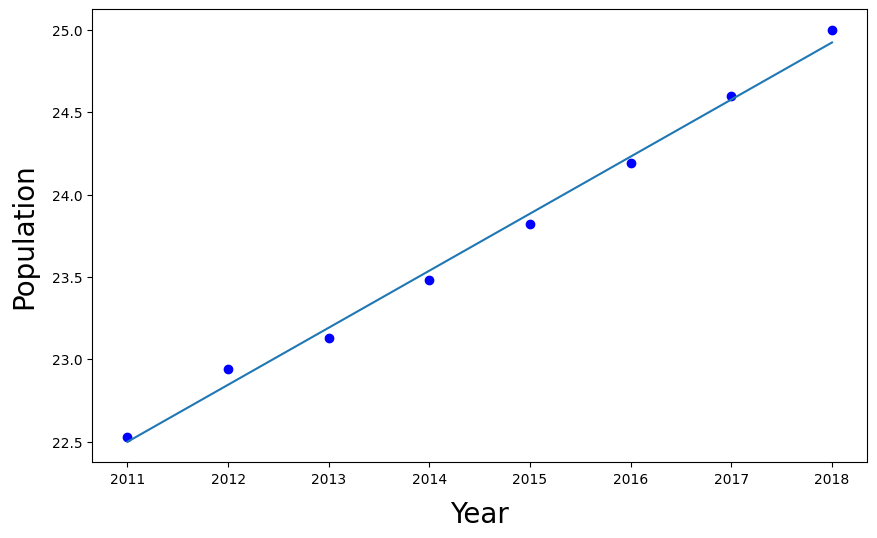

In [ ]:
# Build linear regression model (degree=1) to learn the relationship between X_poly and train_popu_y
from numpy.polynomial import Polynomial
poly_reg = PolynomialFeatures(degree=1)
x_poly_1 = poly_reg.fit_transform(train_popu_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_1,train_popu_y)

#draw scatter
plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(train_popu_x, train_popu_y, color='blue')

x_ticks = np.arange(2011,2019,1)
plt.xticks(x_ticks)

x = np.arange(2011,2019).reshape([-1,1])
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Population', fontsize=20, labelpad=10)
plt.show()

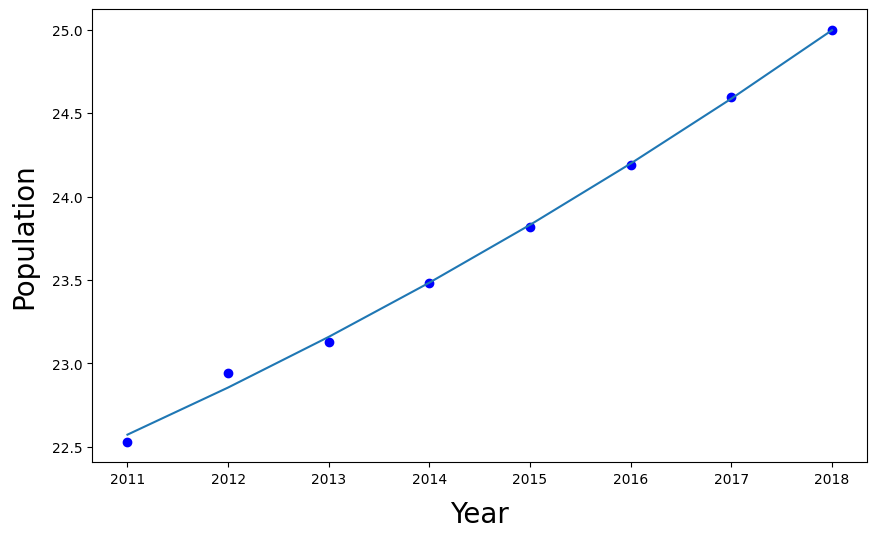

In [ ]:
# Build linear regression model (polynomial regression, degree=2) to learn the relationship between X_poly and train_popu_y
from numpy.polynomial import Polynomial
poly_reg = PolynomialFeatures(degree=2)
x_poly_2 = poly_reg.fit_transform(train_popu_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_2,train_popu_y)

#draw scatter
plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(train_popu_x, train_popu_y, color='blue')

x_ticks = np.arange(2011,2019,1)
plt.xticks(x_ticks)

x = np.arange(2011,2019).reshape([-1,1])
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Population', fontsize=20, labelpad=10)
plt.show()

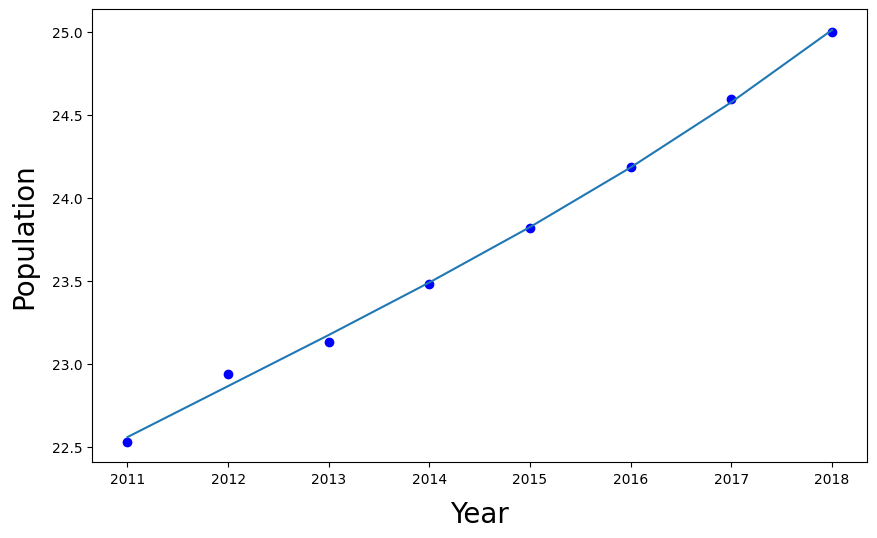

In [ ]:
# Build linear regression model (polynomial regression, degree=3) to learn the relationship between X_poly and train_popu_y
from numpy.polynomial import Polynomial
poly_reg = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg.fit_transform(train_popu_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_3,train_popu_y)

#draw scatter
plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.scatter(train_popu_x, train_popu_y, color='blue')

x_ticks = np.arange(2011,2019,1)
plt.xticks(x_ticks)

x = np.arange(2011,2019).reshape([-1,1])
plt.plot(x,lin_reg.predict(poly_reg.fit_transform(x)))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Population', fontsize=20, labelpad=10)
plt.show()

As there is alomost no difference between the results by adjusting 'degree=2' and 'degree=3', keep 'degree=2'.

In [ ]:
#Using polynomial regression model (degree=2) to test the population of 2019 to 2021
poly_reg = PolynomialFeatures(degree=2)
x_poly_2 = poly_reg.fit_transform(train_popu_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_2,train_popu_y)

test_x = poly_reg.fit_transform(test_popu_x)
test_y = lin_reg.predict(test_x)
print(test_y)

[25.43053571 25.88363095 26.35803571]


In [ ]:
# Evaluate model
true_y = test_popu_y.astype(float)
MSE = metrics.mean_squared_error(true_y, test_y)
RMSE = metrics.mean_squared_error(true_y, test_y)**0.5
R2 = r2_score(true_y, test_y)
print(MSE)
print(RMSE)
print(R2)

0.1451954587979781
0.38104521883626635
-4.594003121497335


As R2 is less than 0, we need to adjust the parameter.

In [ ]:
#Using polynomial regression model (degree=1) to test the population of 2019 to 2021
poly_reg = PolynomialFeatures(degree=1)
x_poly_1 = poly_reg.fit_transform(train_popu_x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly_1,train_popu_y)

test_x = poly_reg.fit_transform(test_popu_x)
test_y = lin_reg.predict(test_x)
print(test_y)

[25.27071429 25.6172619  25.96380952]


In [ ]:
# Evaluate model
true_y = test_popu_y.astype(float)
MSE = metrics.mean_squared_error(true_y, test_y)
RMSE = metrics.mean_squared_error(true_y, test_y)**0.5
R2 = r2_score(true_y, test_y)
print(MSE)
print(RMSE)
print(R2)

0.023271792328041063
0.15255094994145746
0.10339841201898337


As R2 is a bit greater than 0, this model does not fit well. Move to next model.

## Autoregressive Integrated Moving Average Model

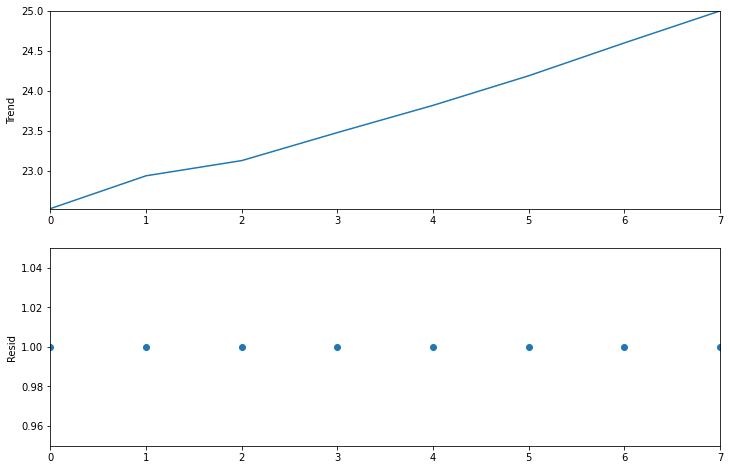

In [ ]:
# ETS Decomposition Models(trend, residual)
arima_data = train_popu['Population']
result = seasonal_decompose(arima_data, model='multiplicative', freq=1)
plt.figure(figsize=(12,8))
plt.xticks(train_popu.index[::1], rotation=0) 
plt.margins(0)
plt.subplot(2,1,1)
plt.plot(result.trend)
plt.ylabel('Trend')
plt.xticks(train_popu.index[::1], rotation=0)
plt.margins(0)
plt.subplot(2,1,2)
plt.scatter(train_popu.index,result.resid);
plt.ylabel('Resid')
plt.xticks(train_popu.index[::1], rotation=0)
plt.margins(0) 

In [ ]:
# Dickey-Fuller test
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print("Results of Dickey-Fuller Test\n-----------------------------------------------------")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index = [
        "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    print("-----------------------------------------------------")  
   
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing.")
adf_test(arima_data)

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                 6.546167
p-value                        1.000000
#Lags Used                     1.000000
Number of Observations Used    6.000000
Criterical Value (1%)         -5.354256
Criterical Value (5%)         -3.646238
Criterical Value (10%)        -2.901198
dtype: float64
-----------------------------------------------------
The data is non-stationary, so do differencing.


Test Statistic > Criterical Value (10%) The data is non-stationary, so do differencing.

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                -2.153814
p-value                        0.223433
#Lags Used                     1.000000
Number of Observations Used    5.000000
Criterical Value (1%)         -6.045114
Criterical Value (5%)         -3.929280
Criterical Value (10%)        -2.986810
dtype: float64
-----------------------------------------------------
The data is non-stationary, so do differencing.


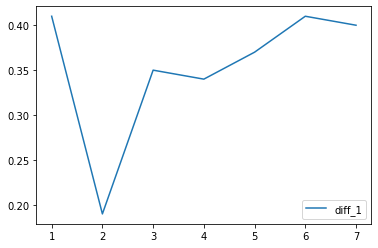

In [ ]:
# First order difference 
diff_1 = arima_data - arima_data.shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()
diff_1.plot(figsize=(6,4), label='diff_1')
plt.legend()

adf_test(diff_1)

Results of Dickey-Fuller Test
-----------------------------------------------------
Test Statistic                -1.480418e+01
p-value                        2.077412e-27
#Lags Used                     0.000000e+00
Number of Observations Used    5.000000e+00
Criterical Value (1%)         -6.045114e+00
Criterical Value (5%)         -3.929280e+00
Criterical Value (10%)        -2.986810e+00
dtype: float64
-----------------------------------------------------
The data is stationary. (Criterical Value 1%)


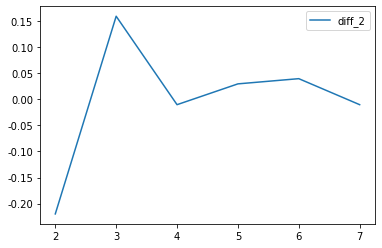

In [ ]:
# Second oreder difference 
diff_2 = diff_1 - diff_1.shift(1) 
diff_2 = diff_2.dropna()
diff_2.head()
diff_2.plot(figsize=(6,4), label='diff_2')
plt.legend()

adf_test(diff_2)

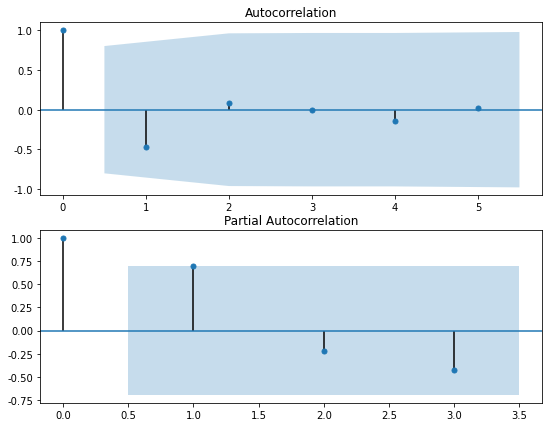

In [ ]:
# Draw ACF(Autocorrelation Function)、PACF(Partial Autocorrelation Function)
# Find best p/q
f = plt.figure(facecolor='white', figsize=(9,7))
ax1 = f.add_subplot(211)
plot_acf(diff_2, lags=5, ax=ax1);
ax2 = f.add_subplot(212);
plot_pacf(arima_data, lags=3, ax=ax2);
plt.rcParams['axes.unicode_minus'] = False 
plt.show()

According to the figures above, p=0,q=1

In [ ]:
# Build the ARIMA Model
arima_data = arima_data.astype('float64')
model = ARIMA(arima_data, order=(0,2,1))
model_fit = model.fit(disp=-1)

#Showing summary of model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D2.Population   No. Observations:                    6
Model:                 ARIMA(0, 2, 1)   Log Likelihood                   6.496
Method:                       css-mle   S.D. of innovations              0.070
Date:                Wed, 14 Dec 2022   AIC                             -6.991
Time:                        06:12:41   BIC                             -7.616
Sample:                             2   HQIC                            -9.492
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0154      0.013      1.166      0.244      -0.010       0.041
ma.L1.D2.Population    -1.0000      0.437     -2.290      0.022      -1.856      -0.144
                

In [ ]:
# Find the parameters which cause the smallest AIC
def arima_AIC(data, p=1, d=3, q=2):
  best_AIC = -6.991
  L = len(data)
  for i in range(p):
    for j in range(d):
      for k in range(q):
        model = ARIMA(data, order=(i,j,k))
        fitted = model.fit(disp=-1)
        AIC = fitted.aic
        if AIC < best_AIC:
          best_AIC = AIC
          best_para = {'i':i, 'j':j, 'k':k} 
  print(best_para)
  print(best_AIC)

arima_AIC(arima_data, p=1, d=3, q=2)

{'i': 0, 'j': 1, 'k': 0}
-13.076065388554376


Best order=(0,1,0)

In [ ]:
# Rebulid the ARIMA Model
arima_data = arima_data
model = ARIMA(arima_data, order=(0,1,0))
model_fit = model.fit(disp=-1)

#Showing summary of model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Population   No. Observations:                    7
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   8.538
Method:                           css   S.D. of innovations              0.071
Date:                Wed, 14 Dec 2022   AIC                            -13.076
Time:                        06:38:03   BIC                            -13.184
Sample:                             1   HQIC                           -14.413
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3529      0.027     13.065      0.000       0.300       0.406


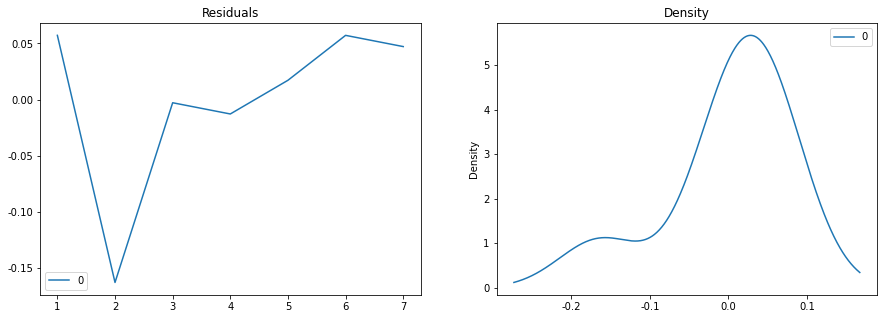

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15, 5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

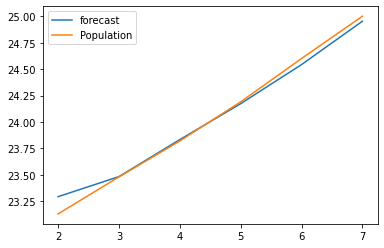

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# Use one-step out-of sample to predict population from 2019 to 2021
test_y = model_fit.forecast(steps=3)[0]
test_y

array([25.35285714, 25.70571429, 26.05857143])

In [ ]:
# Evaluate model
true_y = test_popu_y.astype(float)
MSE = metrics.mean_squared_error(true_y, test_y)
RMSE = metrics.mean_squared_error(true_y, test_y)**0.5
print(MSE)
print(RMSE)

0.03616666659257373
0.19017535747981054


In [ ]:
# Use one-step out-of sample to predict population from 2019 to 2032
test_y = model_fit.forecast(steps=14)[0]
test_y

array([25.35285714, 25.70571429, 26.05857143, 26.41142857, 26.76428571,
       27.11714286, 27.47      , 27.82285714, 28.17571428, 28.52857143,
       28.88142857, 29.23428571, 29.58714286, 29.94      ])

In [ ]:
# Creat a dataframe to present the prediction from 2022 to 2032
df_pred_popu = pd.DataFrame(columns=('Year','Predicted Population'))
df_pred_popu['Year'] = np.arange(2022,2033,1)
df_pred_popu['Predicted Population'] = pd.Series(test_y[3:14])
df_pred_popu

,Year,Predicted Population
0,2022,26.411429
1,2023,26.764286
2,2024,27.117143
3,2025,27.470000
4,2026,27.822857
5,2027,28.175714
6,2028,28.528571
7,2029,28.881429
8,2030,29.234286
9,2031,29.587143


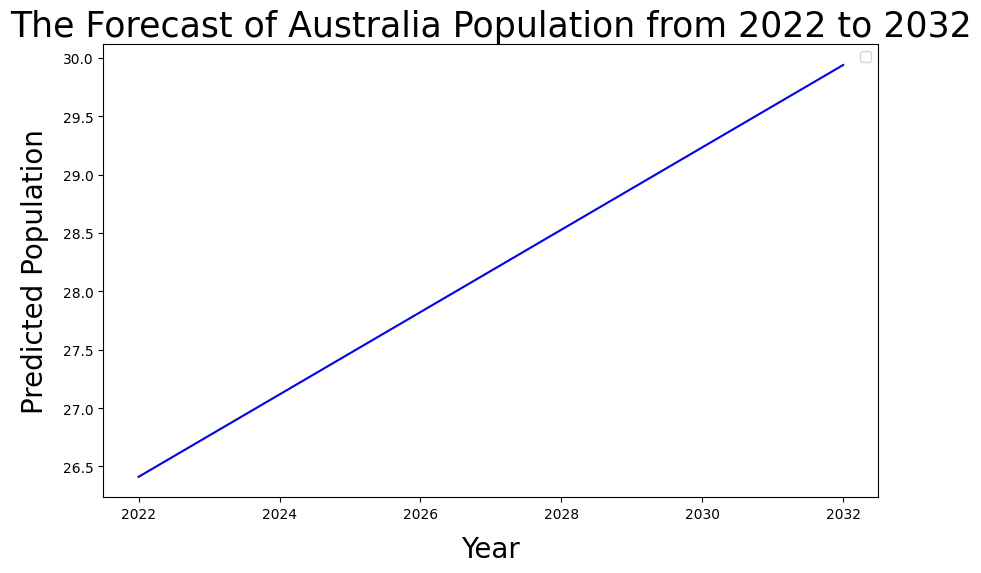

In [ ]:
#draw figure
x = df_pred_popu['Year']
y = df_pred_popu['Predicted Population']

plt.figure(figsize=(10,6), dpi=100, linewidth=2)
plt.plot(x, y, color='blue')
plt.title('The Forecast of Australia Population from 2022 to 2032',fontsize=25, x=0.5, y=1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Predicted Population', fontsize=20, labelpad=10)
plt.legend()
plt.show()

#Build Model to Predict Australian EV Charging Station Number in Next decade
